In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\HP\Desktop\DataScience\DataSets\PIMA\diabetes.csv') 
import warnings 
warnings. simplefilter(action='ignore', category=Warning)

In [21]:
!pip install missingno
import missingno as msno 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


->All the values are numerical quantities.It would be further used for predicting if a person has  Diabetes or Not.
->There seemed to be many zeros in the Parameters where there shouldn't be zeros. In all the parameters except outcome , there shouldn't be any zero. Converting all the cells of zeros to np.NaN or None values  other than outcome column.

In [29]:
import numpy as np
c=[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in c :
    for j in range(len(df[i])):
         if df[i][j] ==0:
                df[i][j] = np.NaN
#conversion of all zeros in input columns to None

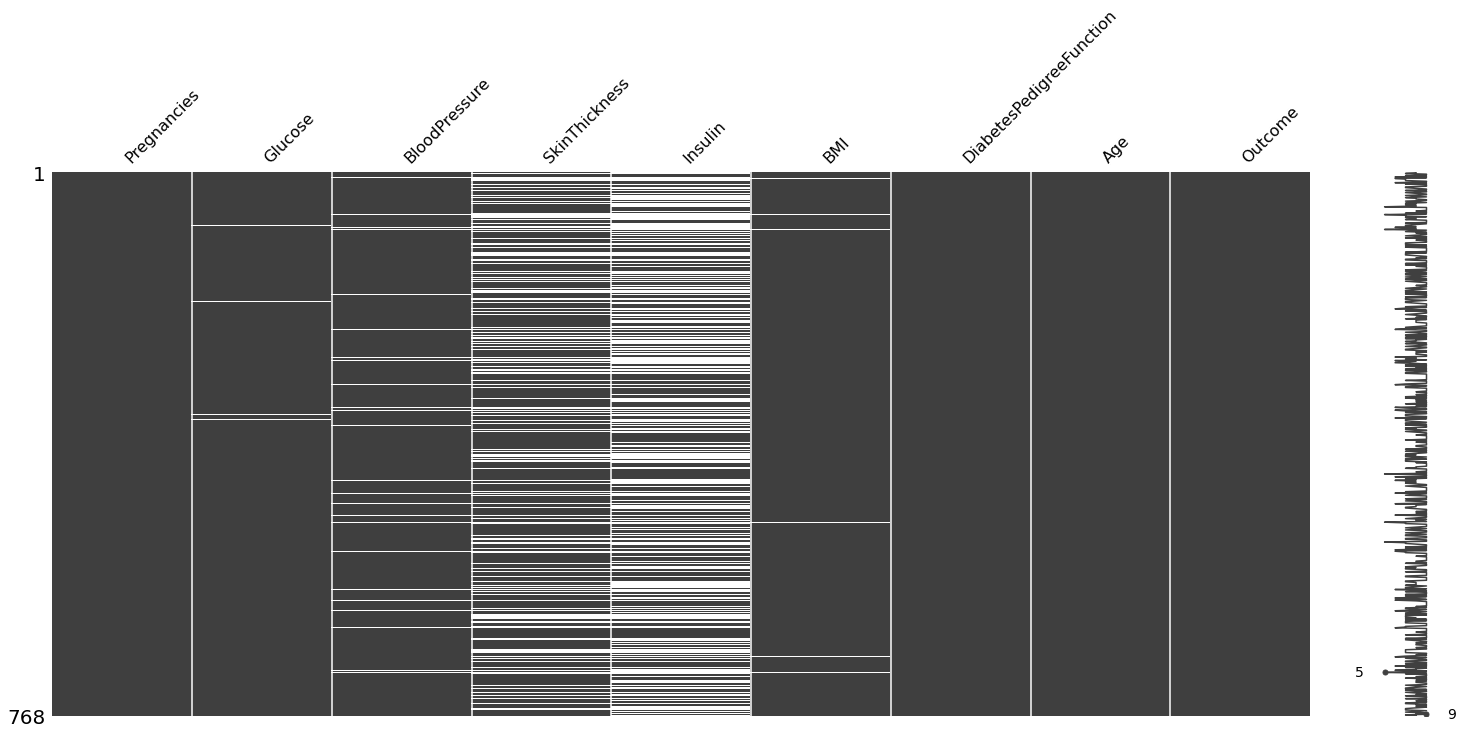

In [31]:
msno.matrix(df)

There seemed to be many Null values in skin thickness and insulin columns. followed by blood pressure. Let's check if we can check whether the Null values of skin thickness and insulin are common for same rows.

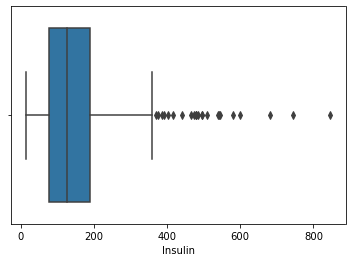

In [35]:
sns.boxplot(df['Insulin'])

Checking for outliers in the Insulin column.

In [47]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Finding the number of NaN values in each column.

In [44]:
(df.isnull().sum()/ len(df) ) * 100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

Finding the % percentage of Null values in each column . ( dividing the above cell values with total no of columns)

In [60]:
df[(df['Insulin'].isna()) & (df['SkinThickness'].isna())].isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                33
SkinThickness               227
Insulin                     227
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In the above cell the filtering method is used to find if the commonnalities are present in columns of Skinthickness and Insulin. From the above filter and the msno cell, we found that if there a Null value in Insulin , there is also a Null value in Skinthickenss.

In [38]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Five point summary for the dataframe before filling null values with mean or median.

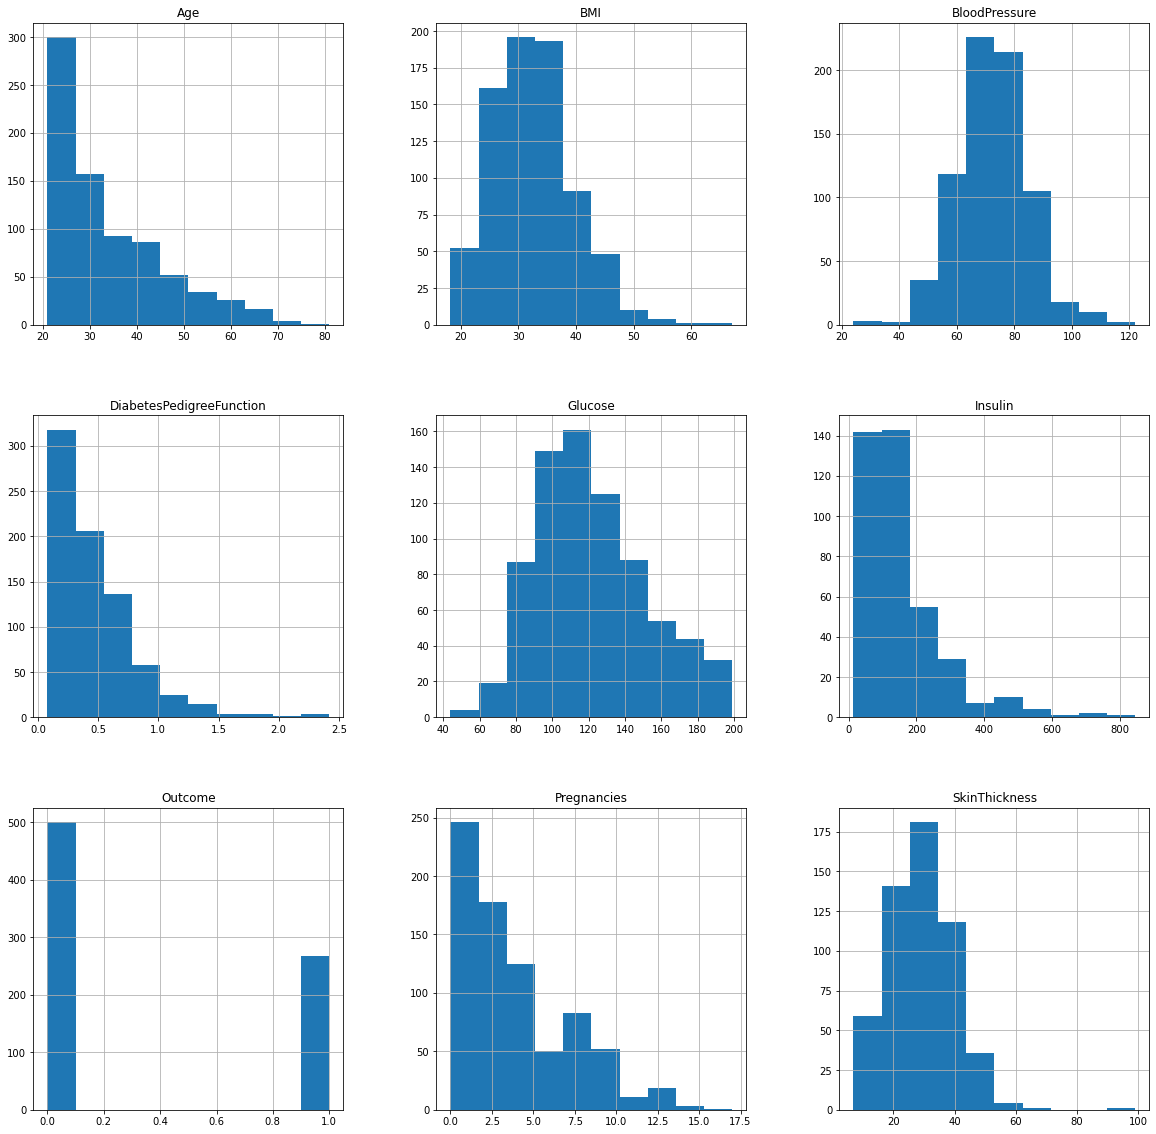

In [49]:
df.hist(figsize=(20,20))
plt.show()

In [88]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
#imputing null values with median and mode.

In [89]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

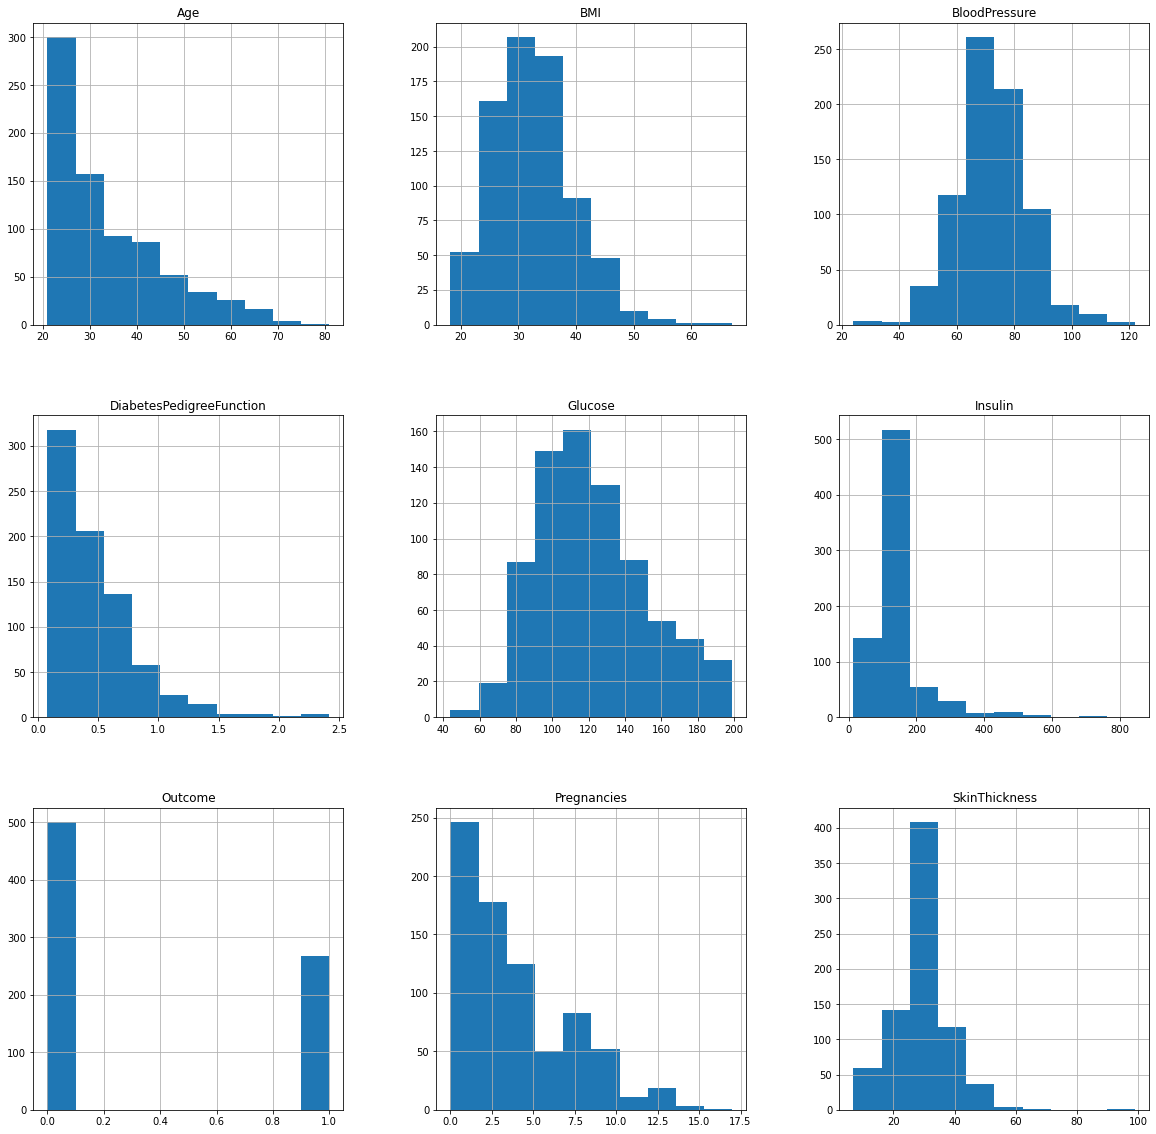

In [90]:
df.hist(figsize=(20,20))
plt.show()

Histogram after imputing Null values with mean or median.

In [14]:
# drop_A=df.index[df["Pregnancies"] == 0].tolist()
# drop_B = df.index[df["Glucose"] == 0].tolist()
# drop_C = df.index[df["BloodPressure"] == 0].tolist()
# drop_D = df.index[df['SkinThickness'] == 0].tolist()
# drop_E = df.index[df['Insulin'] == 0].tolist()
# drop_F = df.index[df["BMI"] == 0].tolist()
# drop_G = df.index[df["DiabetesPedigreeFunction"] == 0].tolist()
# drop_H = df.index[df["Age"] == 0].tolist()
# c = drop_A+drop_B + drop_C + drop_D + drop_E + drop_F + drop_G + drop_H 
# df = df.drop(df.index[c])


the above code was used to find the number of rows remained after removing all the null values . The number was very low. So , the values were kept.

In [219]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Five point statistics to understand the change after imputation.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


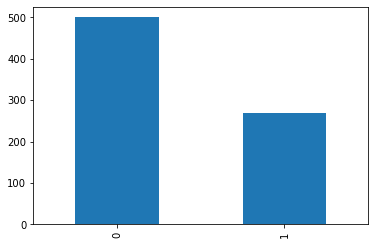

In [107]:
df['Outcome'].value_counts().plot(kind='bar')

here most of the values are with outcome 0.

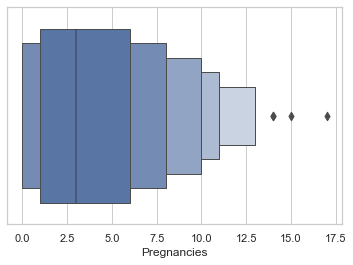

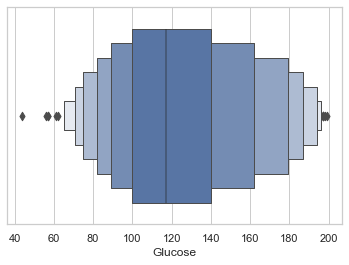

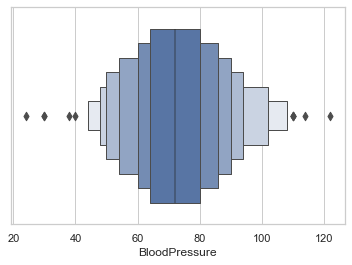

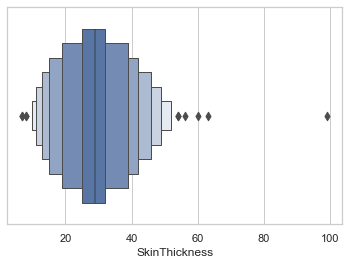

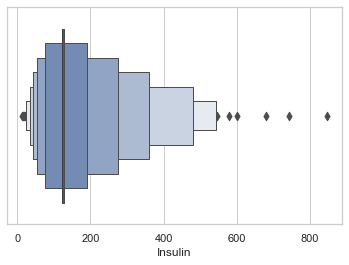

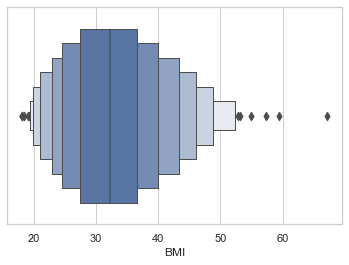

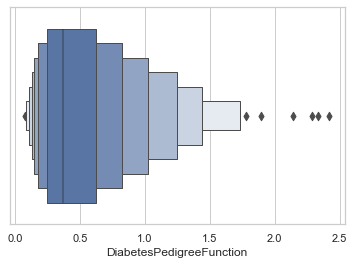

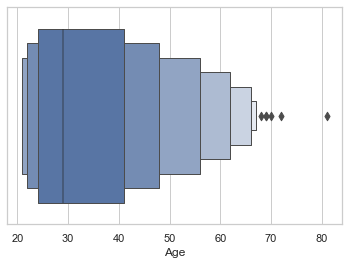

In [131]:
import seaborn as sns
sns.set_theme(style="whitegrid")

for i in df.columns[0:-1]:
    plt.figure()
    sns.boxenplot(x=i, color="b",scale="linear", data=df)

->Most of the pregnancies are in the range 1 to 5 . However there are outliers which are more than 12.5
->The maximum glucose content is between 100 and 140.
-> the outliers are found out with the help of box plot.


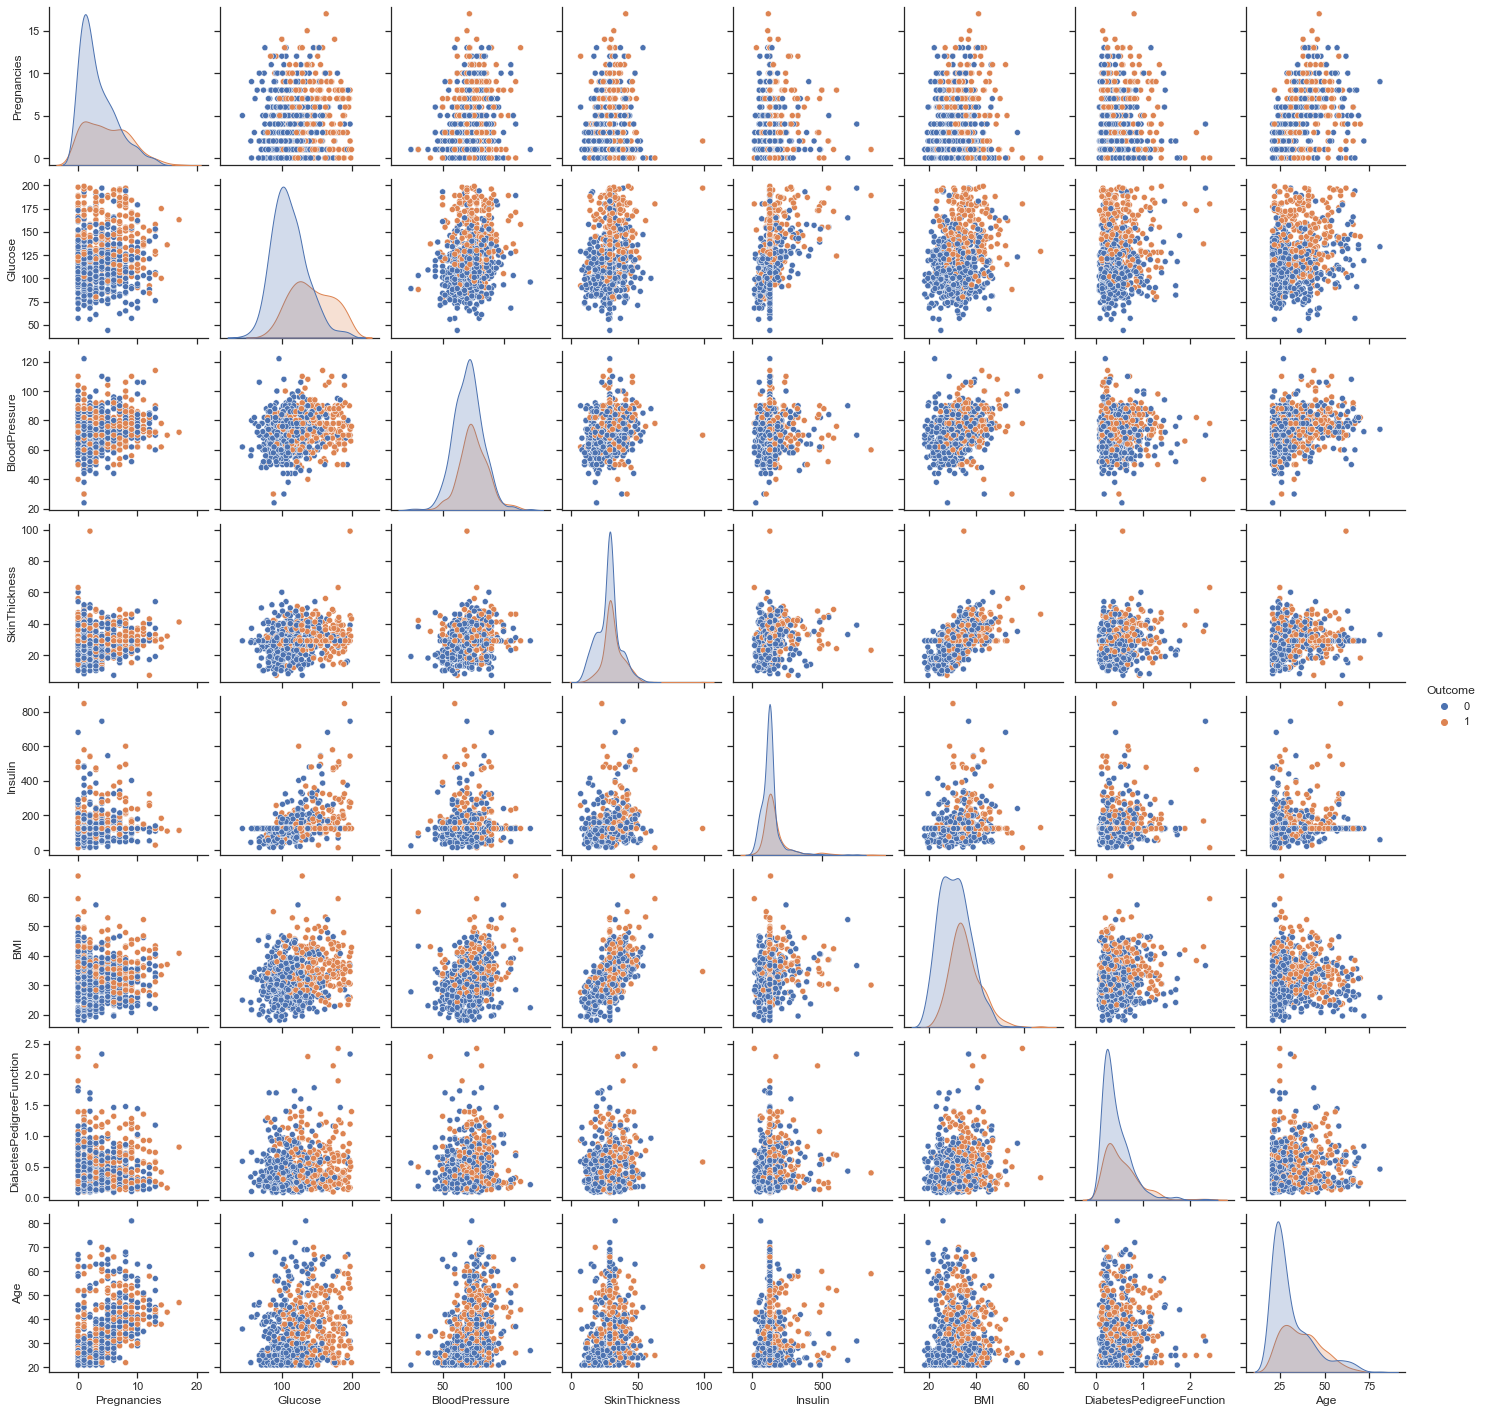

In [152]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df, hue= 'Outcome')

In [146]:
df.corr()['Outcome'].sort_values()

BloodPressure               0.166074
DiabetesPedigreeFunction    0.173844
Insulin                     0.203790
SkinThickness               0.214873
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.312038
Glucose                     0.492928
Outcome                     1.000000
Name: Outcome, dtype: float64

Here the correlation was found out with all the other columns. The glucose column was highly correlated. Here we can observe that all the columns are positively correlated. 
-> the glucose and bmi columns are highly correlated follwed by age ,pregnancies and skinthickness.

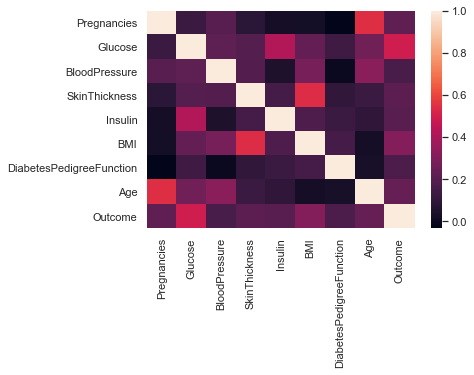

In [143]:
sns.heatmap(df.corr())


-> top three factors affecting the outcome are 1) Glucose 2) BMI 3) Age
-> least significant factors are 1) Bloodpressure 2) Diabetes Pedigree Function 3) Insulin

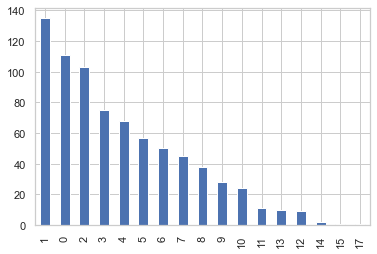

In [144]:
df['Pregnancies'].value_counts().plot(kind='bar')

Most of the pregnancies are in the range 0 to 2.

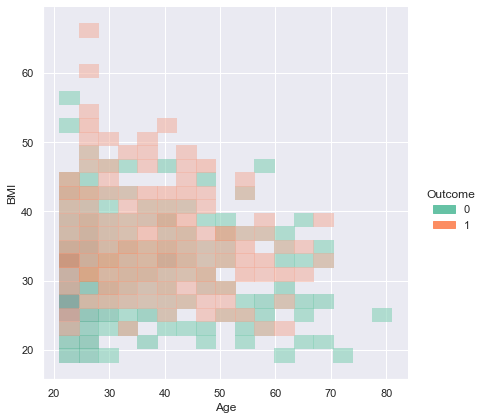

In [237]:
sns.displot(
    data=df, kind="hist",
    x="Age", y="BMI", hue="Outcome",
     palette="Set2", alpha=.6, height=6)

sns.set()


-> people with bmi in range around 20 , tend to not have diabetes in all age groups.

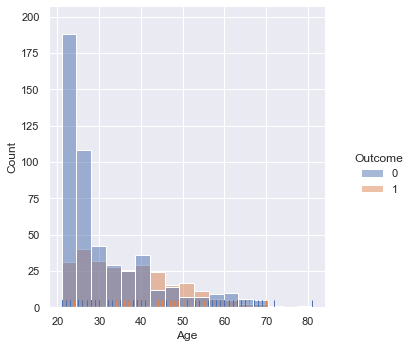

In [211]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.set()
sns.displot(
    df, x="Age", hue="Outcome",
     facet_kws=dict(margin_titles=True),rug=True
)
sns.set()

-> combining both bar graphs of outcomes 0 and 1 

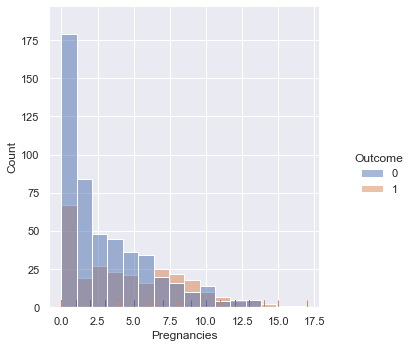

In [210]:
sns.displot(
    df, x="Pregnancies",
     facet_kws=dict(margin_titles=True),hue='Outcome',rug=True
)
sns.set()

-> people with more pregnancies tend to have diabetes.

In [209]:
df.groupby("Outcome").agg(['mean','median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          3.298000      2  110.710121  107.5     70.935397   72.0   
1          4.865672      4  142.165573  140.0     75.147324   74.0   

        SkinThickness            Insulin               BMI         \
                 mean median        mean median       mean median   
Outcome                                                             
0           27.726000   29.0  127.792000  125.0  30.885600  30.40   
1           31.686567   29.0  164.701493  125.0  35.383582  34.25   

        DiabetesPedigreeFunction               Age         
                            mean median       mean median  
Outcome                                                    
0                       0.429734  0.336  31.190000     27  
1                       0.550500  0.449  37.067164     36

In the above cell we can observe that all the parameters for 1 outcome are more(mean). For example, people with more DiabetesPedigreeFunction column tend to have more value for 1 outcome. People with 0 outcome have less diabetes pedigree function. The same applies for all the columns.

In [193]:
pd.pivot_table(df, index =['Outcome'], aggfunc={'Insulin': np.mean,'BMI': np.mean})

,BMI,Insulin
Outcome,,
0,30.885600,127.792000
1,35.383582,164.701493


The mean of BMI and Insulin are more for outcome 1 of diabetes.

In [215]:
df1.T

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


People with more pregnancies tend to have have diabetes.

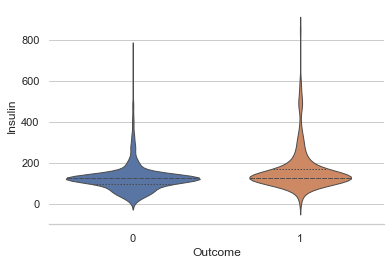

In [216]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset


# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, x="Outcome", y="Insulin",
               split=True, inner="quart", linewidth=1)
sns.despine(left=True)

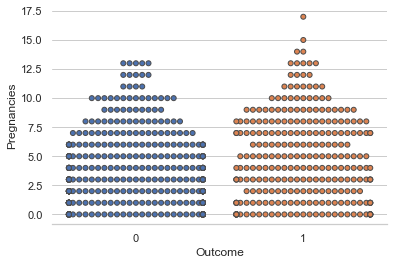

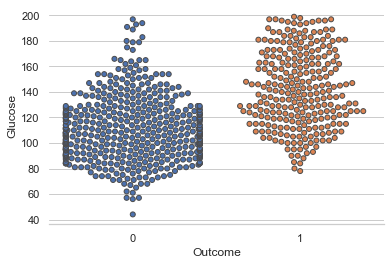

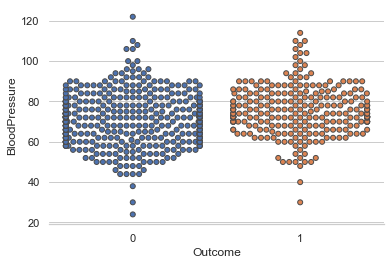

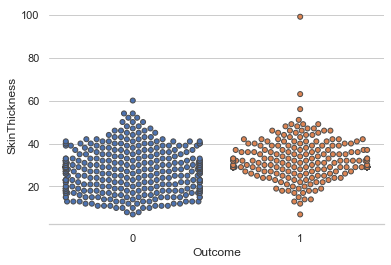

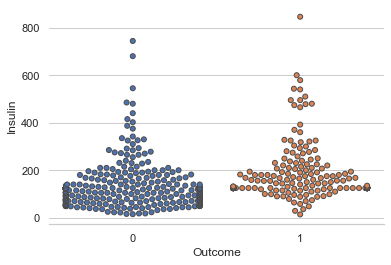

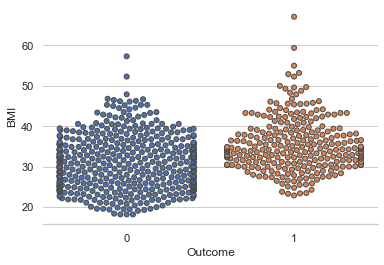

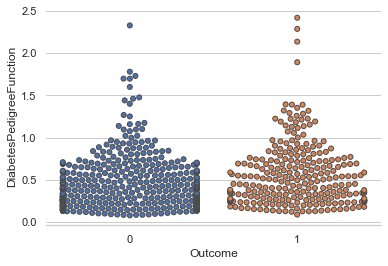

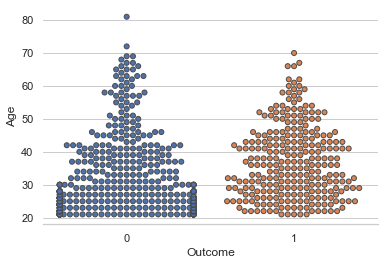

In [225]:
for i in df.columns[:-1]:
    sns.swarmplot(data=df, x="Outcome", y=i,
                   split=True, linewidth=1)
    sns.despine(left=True)
    plt.show()

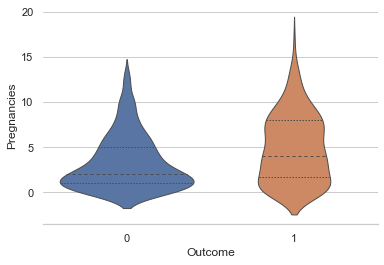

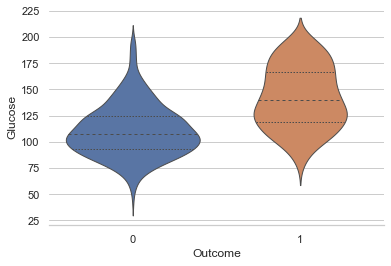

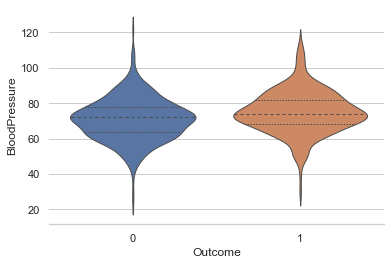

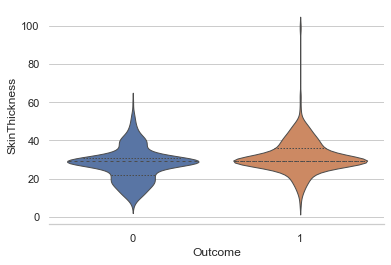

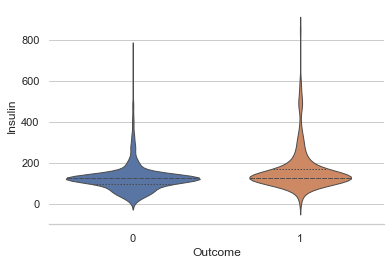

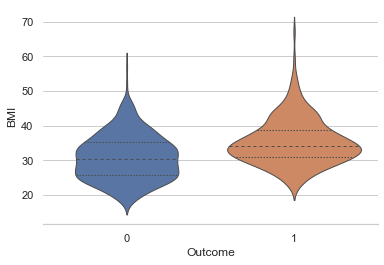

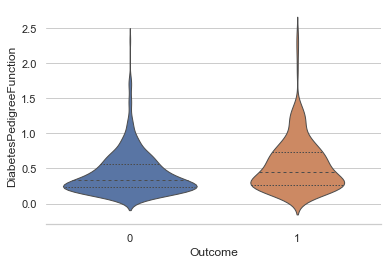

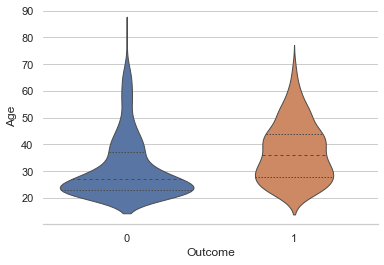

In [218]:
for i in df.columns[:-1]:
    sns.violinplot(data=df, x="Outcome", y=i,
                   split=True, inner="quart", linewidth=1)
    sns.despine(left=True)
    plt.show()

In [238]:
df.groupby("Outcome").agg(['mean','median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          3.298000      2  110.710121  107.5     70.935397   72.0   
1          4.865672      4  142.165573  140.0     75.147324   74.0   

        SkinThickness            Insulin               BMI         \
                 mean median        mean median       mean median   
Outcome                                                             
0           27.726000   29.0  127.792000  125.0  30.885600  30.40   
1           31.686567   29.0  164.701493  125.0  35.383582  34.25   

        DiabetesPedigreeFunction               Age         
                            mean median       mean median  
Outcome                                                    
0                       0.429734  0.336  31.190000     27  
1                       0.550500  0.449  37.067164     36

Most useful insights.
-> People with more BMI , Glucose , Pregnancies , etc tend to have diabetes. 
-> The top three factors affecting the outcome are 1) Glucose 2) BMI 3) Age
-> people with more pregnancies are more susceptible to diabetes.
-> from the above table we can say that all the above columns if they are in higher level, they relate positively to the presence of diabetes.